Kmeans Clustering

Objective: To group customers based on their spendings on different type of products in a wholesale store

In [10]:
pip install yellowbrick


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ------------- -------------------------- 92.2/282.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [1]:
import pandas as pd

In [3]:
#loading dataset
custdata = pd.read_csv(r"C:\Users\Ishwari Kadam\Desktop\SEM 3\MLBA\Wholesale customers data.csv")
custdata.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,101,2,3,12669,9656,7561,214,2674,1338
1,102,2,3,7057,9810,9568,1762,3293,1776
2,103,2,3,6353,8808,7684,2405,3516,7844
3,104,1,3,13265,1196,4221,6404,507,1788
4,105,2,3,22615,5410,7198,3915,1777,5185


In [4]:
custdatadf = custdata.copy()

In [5]:
del custdatadf['CustomerID'] #customer id not required for clustering

In [6]:
custdatadf.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
custdatadf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
#converting df into array
samples = custdatadf.values 
samples

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

Elbow chart to determine number of clusters for the model

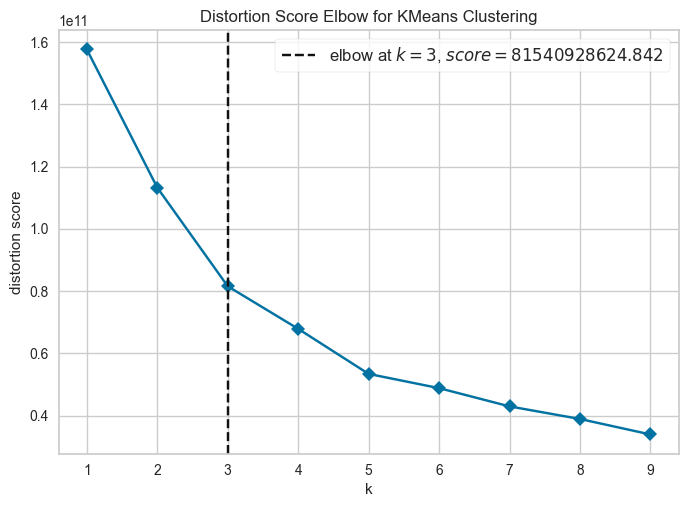

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)       
visualizer.show()

From the above elbow chart, we get to know that the ideal number of clusters is 3 

In [13]:
#building kmeans model for 3 clusters
KMmodel = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [14]:
custdata['Cluster'] = KMmodel.fit_predict(samples)
custdata.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,101,2,3,12669,9656,7561,214,2674,1338,0
1,102,2,3,7057,9810,9568,1762,3293,1776,0
2,103,2,3,6353,8808,7684,2405,3516,7844,0
3,104,1,3,13265,1196,4221,6404,507,1788,0
4,105,2,3,22615,5410,7198,3915,1777,5185,1


In [15]:
#naming the groups
custdata.Cluster = custdata.Cluster.replace([0,1,2],['First Group','Second Group','Third Group'])
custdata.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,101,2,3,12669,9656,7561,214,2674,1338,First Group
1,102,2,3,7057,9810,9568,1762,3293,1776,First Group
2,103,2,3,6353,8808,7684,2405,3516,7844,First Group
3,104,1,3,13265,1196,4221,6404,507,1788,First Group
4,105,2,3,22615,5410,7198,3915,1777,5185,Second Group


In [16]:
custdata.Cluster.value_counts() 

Cluster
First Group     337
Second Group     75
Third Group      28
Name: count, dtype: int64

Group one includes majority of the customers 

In [17]:
KMmodel.cluster_centers_

array([[1.30563798e+00, 2.53709199e+00, 7.39095846e+03, 4.43976855e+03,
        6.29219585e+03, 2.49553412e+03, 2.23865282e+03, 1.15844807e+03],
       [1.16000000e+00, 2.57333333e+00, 3.27680133e+04, 4.82768000e+03,
        5.72314667e+03, 5.53592000e+03, 1.07412000e+03, 2.06664000e+03],
       [1.96428571e+00, 2.53571429e+00, 1.18491786e+04, 2.47171071e+04,
        3.38877143e+04, 3.40932143e+03, 1.54597143e+04, 4.48385714e+03]])

Business Submission

In [18]:
Submission = custdata.loc[:,['CustomerID','Cluster']]
Submission

,CustomerID,Cluster
0,101,First Group
1,102,First Group
2,103,First Group
3,104,First Group
4,105,Second Group
...,...,...
435,536,Second Group
436,537,Second Group
437,538,Third Group
438,539,First Group
